# see19 Guide

**A dataset and interface for visualizing and analyzing the epidemiology of Coronavirus Disease 2019 aka SARS-CoV-2 aka COVID19 aka C19**

Find it on [GitHub](https://github.com/ryanskene/see19)

Current with version 0.3.0

# 5. Visualizing Factors in 4D

3D charts with color-mapping can be used to explore the impact of various factors in different regions at different times

Such '4D' maps are often criticized for lack of readability, but they have been a valuable tool for recognizing  patterns

These charts are available in `CaseStudy` via the `comp_chart4d` attribute, which is an instance of the `CompChart4D` class. The 3D representation shows the `count_category` for each region on z-axis with each day from the `start_hurdle` on the y-axis, and the individual regions sepearted on the x-axis.

The 3D chart is a cute trick, but the real power is derived from the `color_factor`. This maps the color of each 3D bar to the factor one wants to investigate.

`CompChart4D` object utilizes `matplotlib` for chart creation.

In [1]:
from casestudy.see19 import CaseStudy, get_baseframe
baseframe = get_baseframe()
casestudy = CaseStudy(baseframe)

## 5.1  From 3D to 4D

### Most Impacted Regions - Brazil

First, we get region names from the baseframe, sorting as required.

Then we create the `casestudy` instance, including several factors that we'll cover in our analysis.

In [2]:
regions = baseframe[baseframe['country'] == 'Brazil'] \
    .sort_values(by='population', ascending=False) \
    .region_name.unique().tolist()[:20]

factor_dmas={'temp': 3}

casestudy = CaseStudy(
    baseframe, count_dma=5, 
    factors=['temp', 'c1', 'A65PLUSB', 'A75PLUSB'], factor_dmas=factor_dmas,
    regions=regions, start_hurdle=10, start_factor='cases', lognat=True,
)

There are a LARGE number of customization options with `comp_chart4d`.

But the main execution is aligned `comp_chart`. The `make` method renders the chart and `comp_category` provides the main statistic of focus.

Below is some breakdown of the available options. For now, please consult the source code to understand them in better detail.

* You may size each of the x, y, and z-axis labels, ticks, and other parameters by providing the `fs_` prefix.
* You also provide `title`, `subtitle`, and `datetitle` keywords for text annotation. 
* Each text field is positioned via `x_` and `y_` prefix parameters and the text box can be rotated via `rot_`
* `comp_size` will further trim the number of regions by ranking them on the `comp_category`. a separate `rank_category` can be provided for this process if preferred
* `abbreviate` implements a somewhat hacky function to reduce the size of the region names while trying to keep them legible

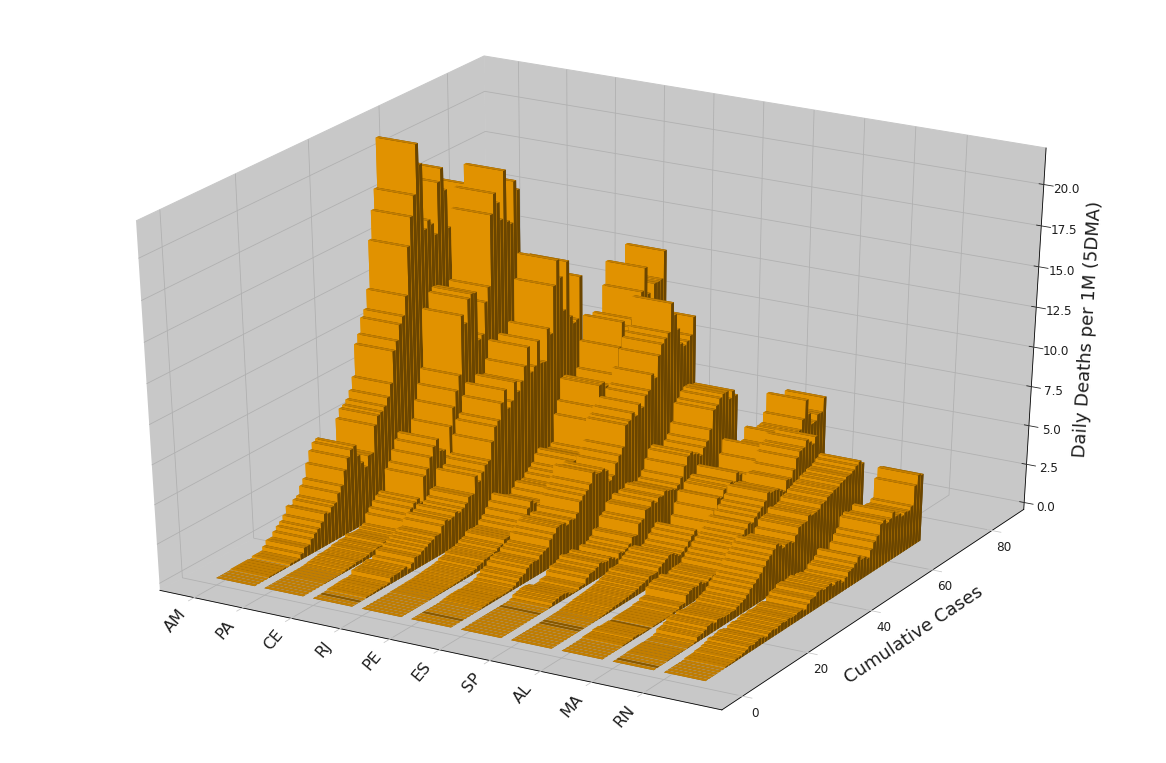

In [3]:
kwargs = {
    'fs_xticks': 16, 'fs_yticks': 12, 'fs_zticks': 12,
    'fs_xlabel': 12, 'fs_ylabel': 18, 'fs_zlabel': 18,
    'tight': True, 'comp_size': 10,
}
p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_1M', **kwargs)

### Adding a Color Factor

By adding the `color_factor` attribute, we can see the impact, if any, of an exogenous factor on the `comp_category` over time.

We will start with `A65PLUSB_%`. As this a time-static factor, the color for each region will be the same regardless of the day.

You must provide additional options to position the color bar.

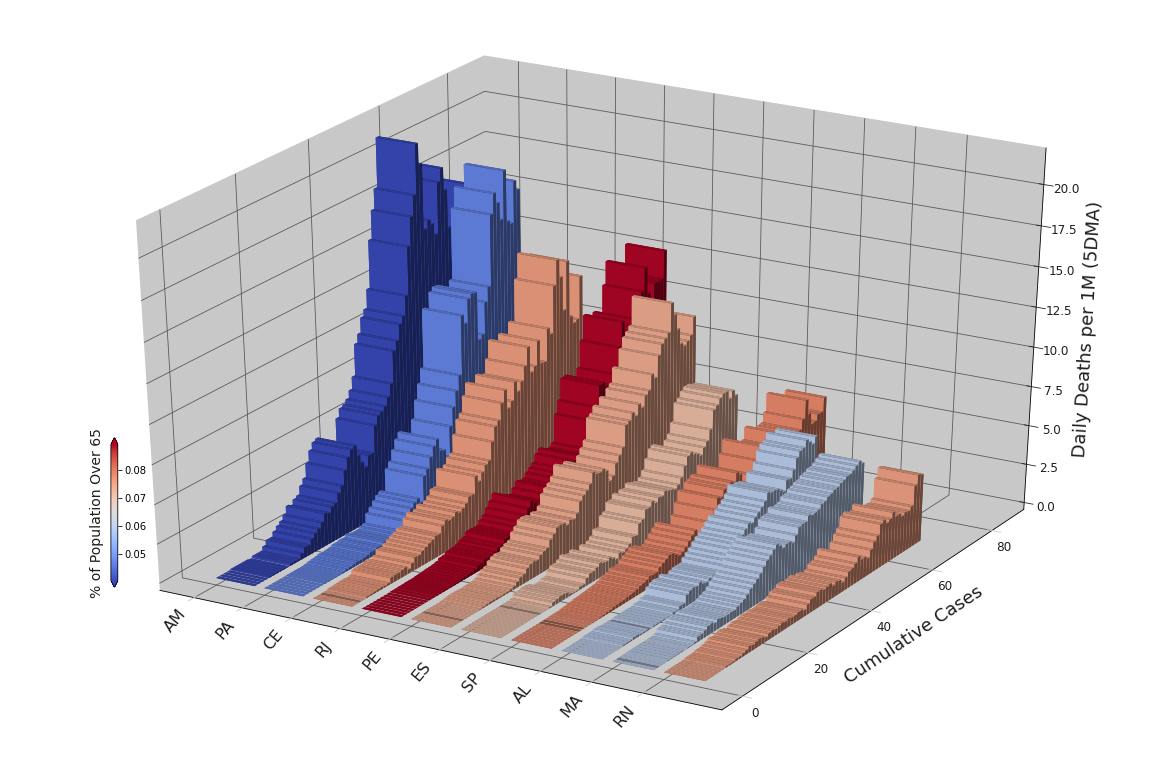

In [4]:
kwargs = {
    **kwargs,
    'color_factor': 'A65PLUSB_%', 'y_title': .8,
    'x_colorbar': 0.09, 'y_colorbar': .225, 'h_colorbar': 20, 'w_colorbar': .01, 
    'a_colorbar': 'vertical', 'lp_colorbar': -57,
}
p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_1M', **kwargs)

Now we'll use `temp`, which is a time-dynamic factor and will provide a different color for each region on each day.

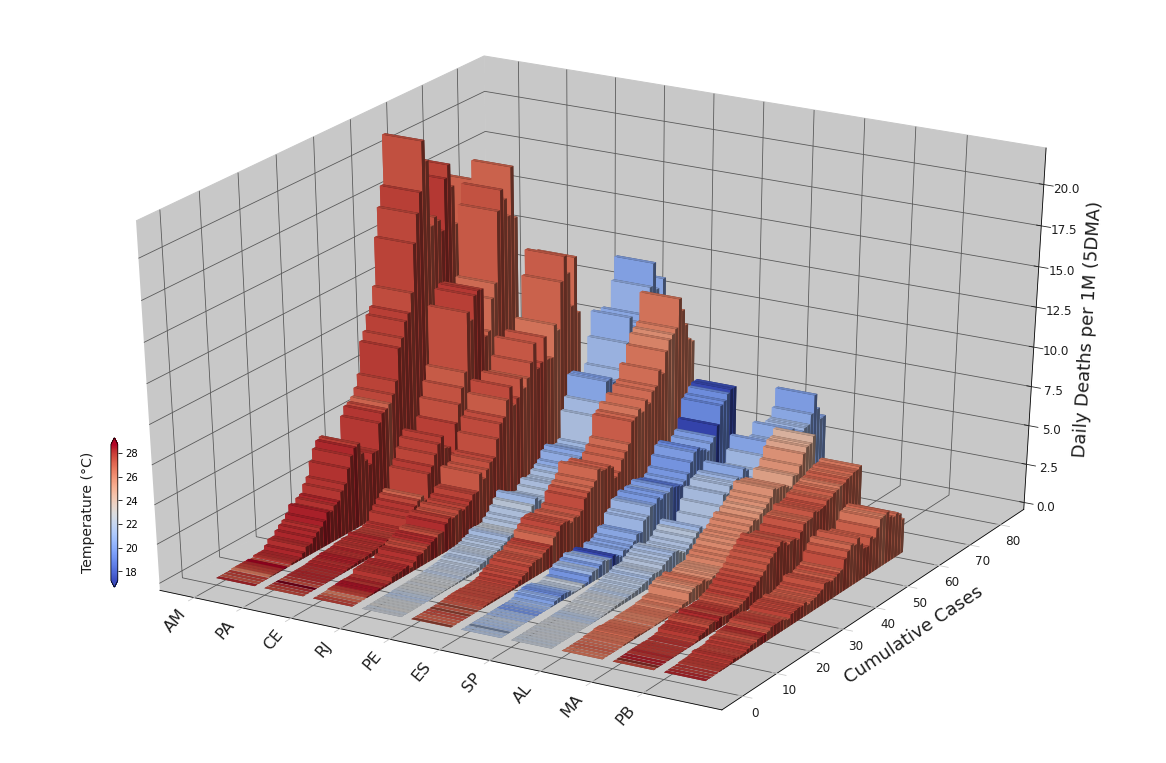

In [5]:
kwargs = {**kwargs, 
    'color_factor': 'temp',
}
p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_1M', **kwargs)

### Fixing the Color Range

***NOTE:*** The range of colors is automatically set the `make` method. This can be somewhat misleading when 
1. comparing multiple charts 
2. when a single chart has temperatures in a narrow range. In the above example, for instance, temperatures range only between 18C - 28C and, yet, the color map runs almost the entire red-blue spectrum.

Thus, there is a `color_interval` option that allows you to fix the color interval. `color_interval` expects a tuple, where the first item is the low-end of the range and the second item is the high-end.

Fixing the color interval provides a very different picture of Brazil's impacted regions.

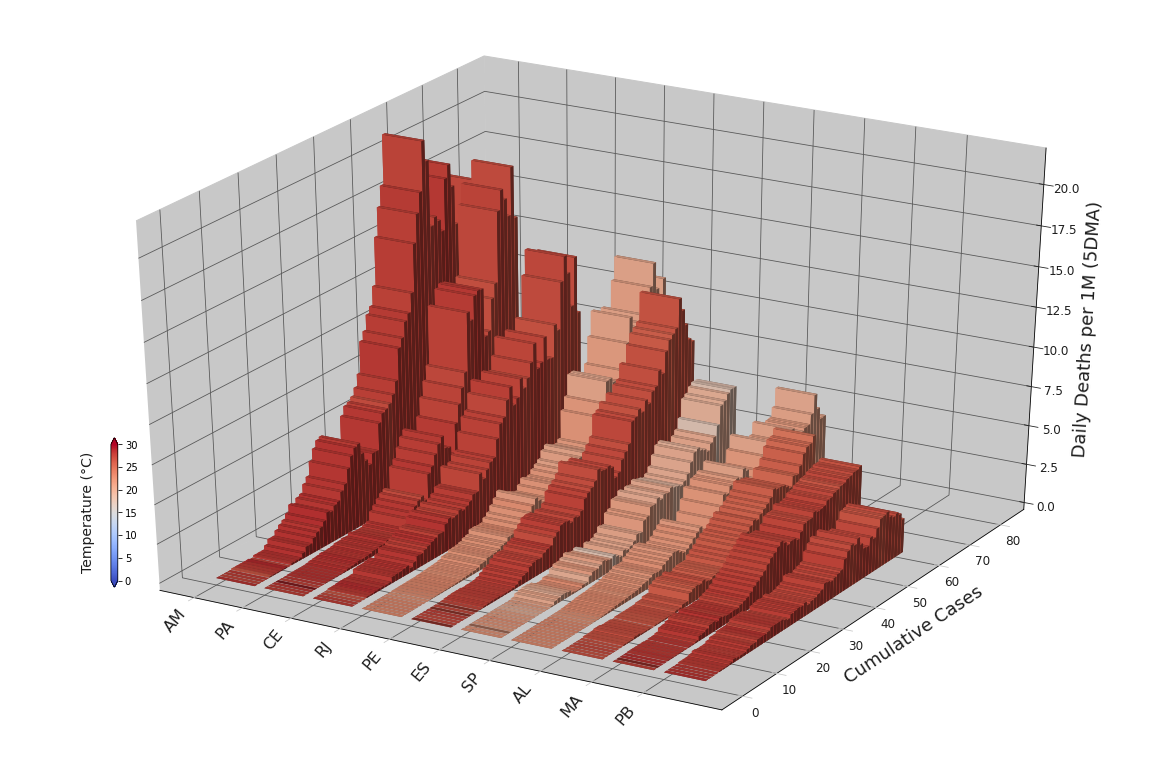

In [6]:
color_interval = (0,30)
kwargs = {**kwargs, 'color_interval': color_interval}
p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_1M', **kwargs)

## 5.2 More on the X-Axis

### Top 30 US States

In [7]:
regions = baseframe[baseframe['country_code'] == 'USA'] \
    .sort_values('cases', ascending='False') \
    .region_name.unique().tolist()[:50]
countries = 'USA'

In [8]:
casestudy = CaseStudy(
    baseframe, regions=regions, countries=countries, count_dma=14,
    factors=['temp', 'uvb', 'rhum', 'A65PLUSB', 'A75PLUSB', 'A05_24B'], factor_dmas={'temp': 14, 'uvb': 14},
    start_hurdle=10, start_factor='cases', 
)

Here 4 charts are prepared in quick succession.

Additional options are shown for editing the background grey and removing gridlines.

**NOTE:** `CompChart4D` automatically sorts the regions on the x-axis such that the regions with the greatest z-axis values are furthest away. This improves readability.

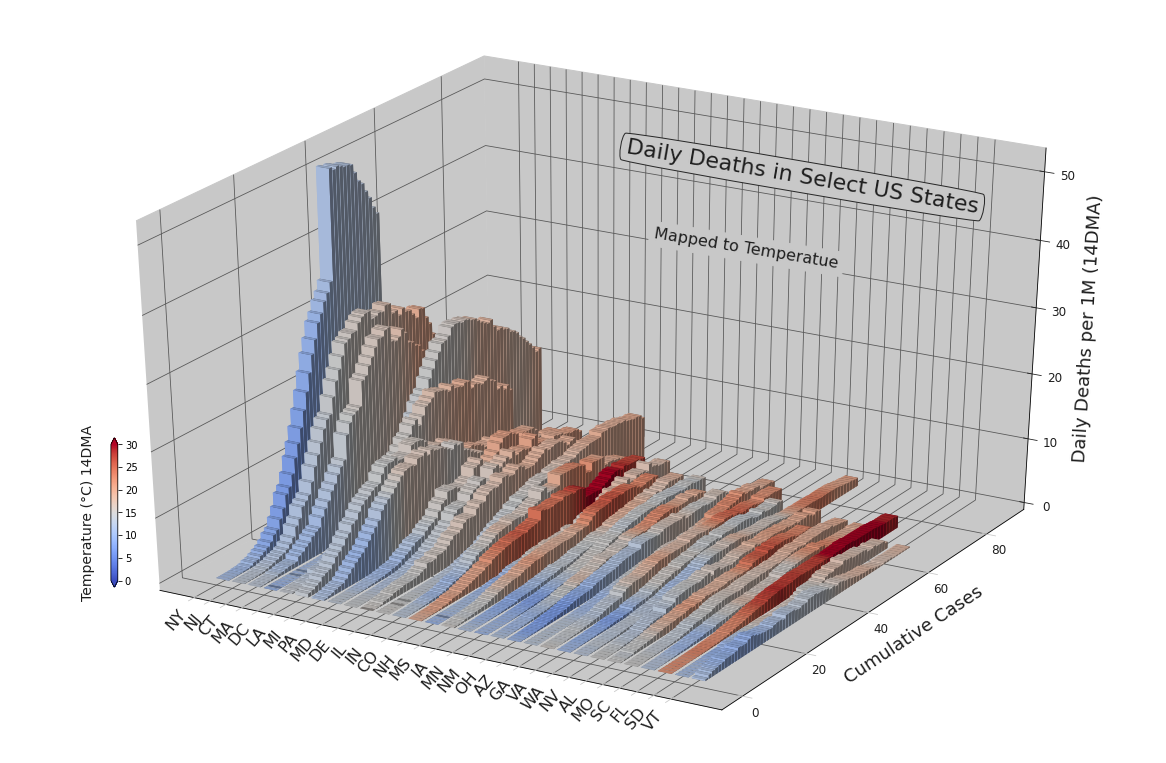

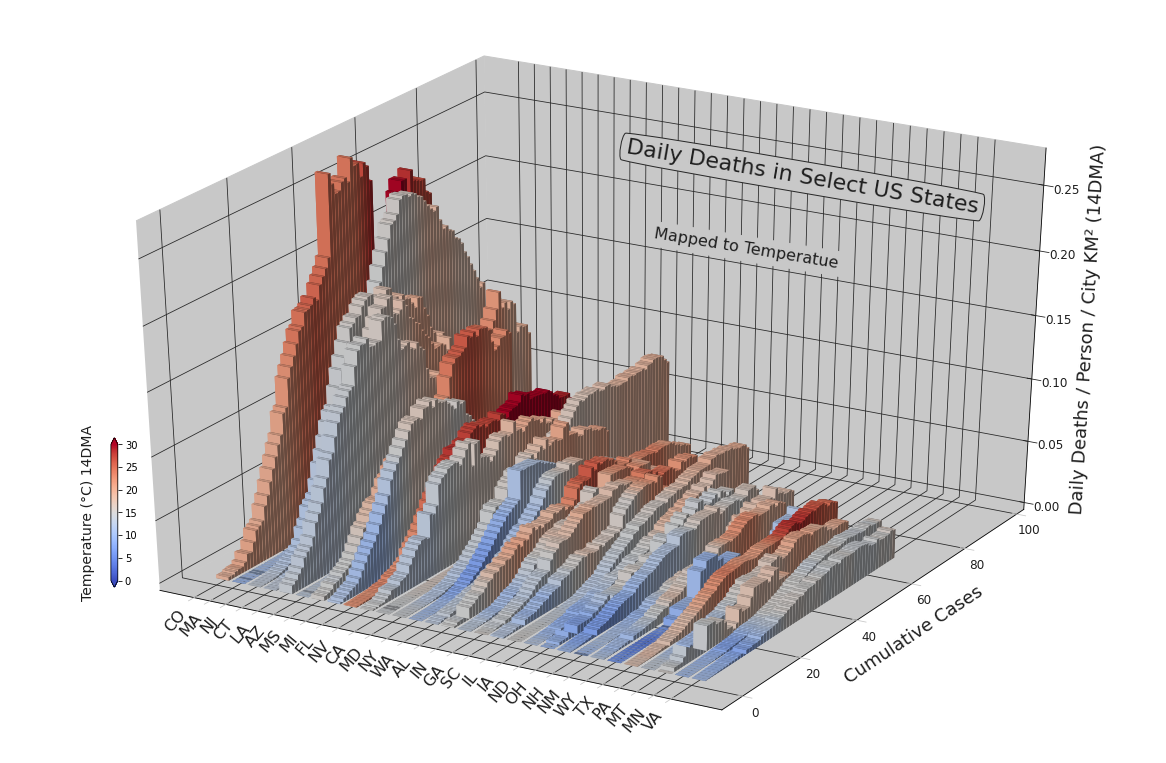

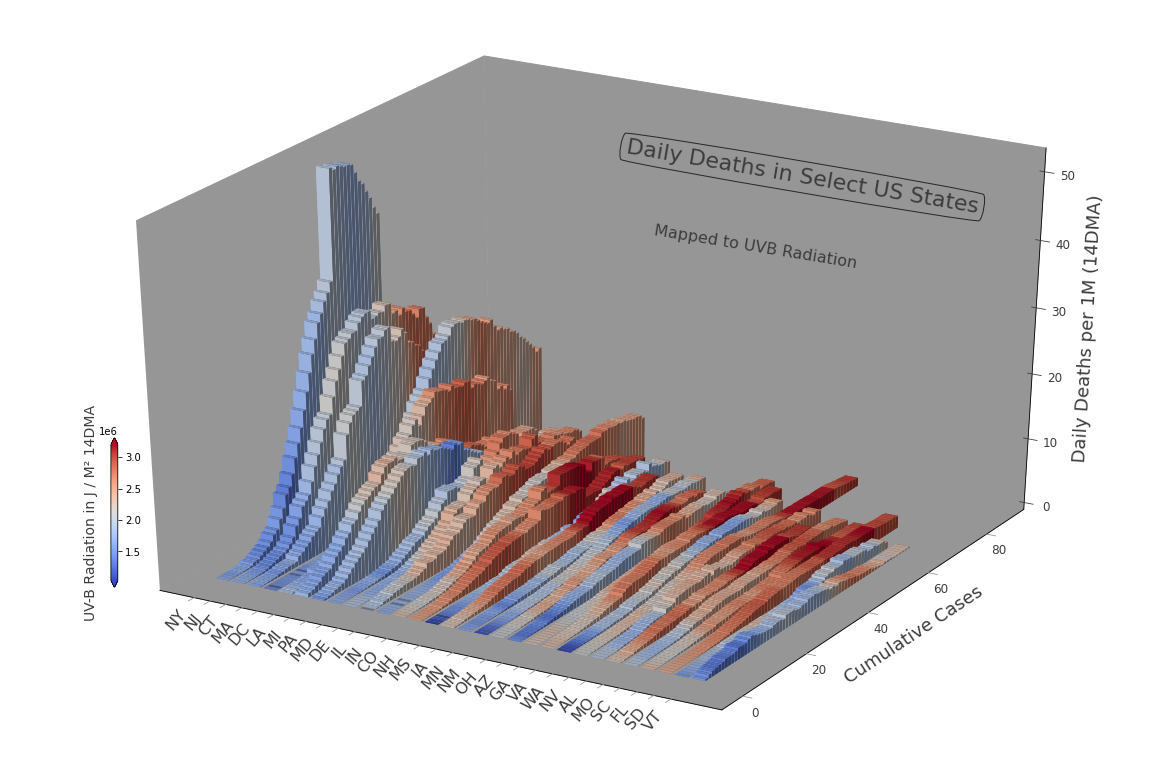

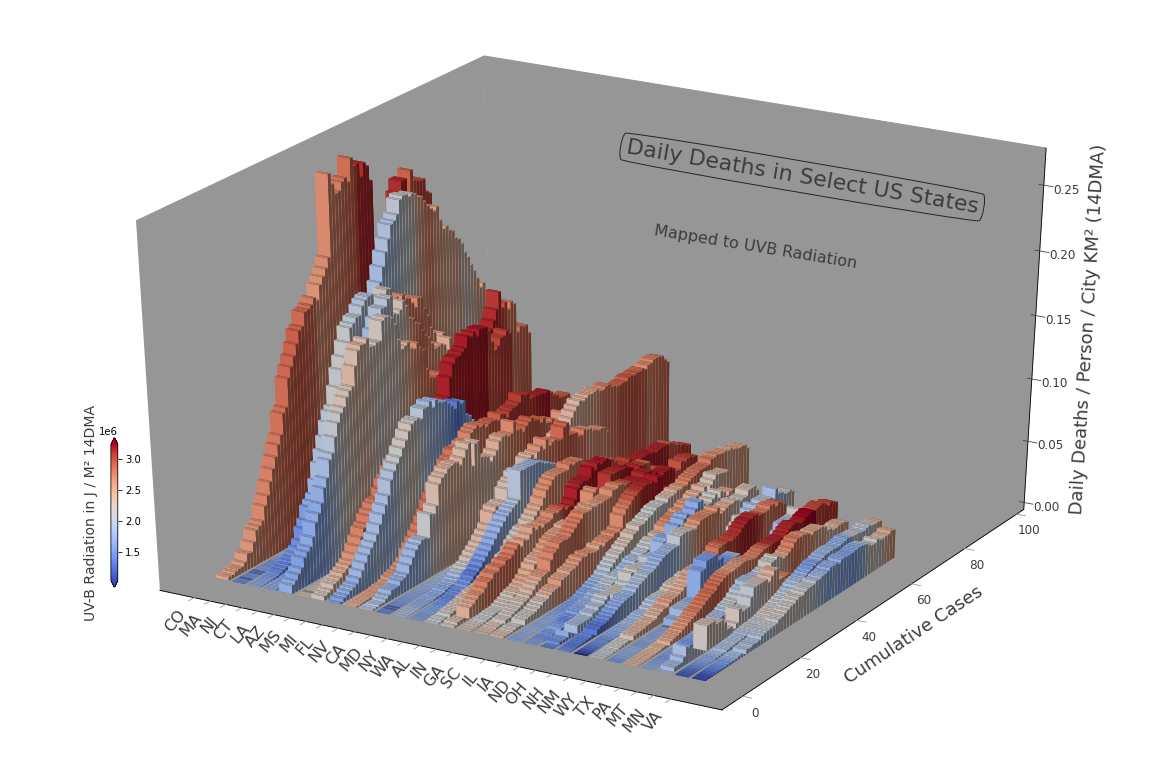

In [9]:
kwargs = {
    'regions': '',
    'fs_xticks': 16, 'fs_yticks': 12, 'fs_zticks': 12,
    'fs_xlabel': 12, 'fs_ylabel': 18, 'fs_zlabel': 18,
    'title': 'Daily Deaths in Select US States',
    'x_title': 0.536, 'y_title': 0.725, 'fs_title': 22, 'rot_title': -9.7,
    'subtitle': 'Mapped to Temperatue', 
    'x_subtitle': 0.561, 'y_subtitle': 0.651, 'fs_subtitle': 16, 'rot_subtitle': -9.3,
    'x_colorbar': 0.09, 'y_colorbar': .225, 'h_colorbar': 20, 'w_colorbar': .01, 
    'a_colorbar': 'vertical',
    'lp_colorbar': -57, 'color_factor': 'temp_dma', 'color_interval': color_interval,
    'grid_grey': 40,
    'tight': True,
    'comp_size': 30,
    'rank_category': 'deaths_new_dma_per_1M'
}

p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_1M', **kwargs)
p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_person_per_city_KM2', **kwargs)

kwargs['color_factor'] = 'uvb_dma'
kwargs['color_interval'] = ()
kwargs['pane_grey'] = 150
kwargs['tick_grey'] = 60
kwargs['gridlines'] = False
kwargs['subtitle'] = 'Mapped to UVB Radiation'

p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_1M', **kwargs)
p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_person_per_city_KM2', **kwargs)

## 5.3 How Far Can We Take It?

### 101 Most Impacted Regions Globally

I acknowledge that using the chart in this way stretches its value, however, it is has been a great way for me to consider trends globally. Try not to look at each individual region ... look at it more like a scatter plot and see what patterns you can identify, if any.

**NOTE:** If the number of regions exceeds **100**, the region labels are removed automatically.

First, we sort the regions in the `baseframe` to find the 101 most populous.

Then, those regions are ranked on the `comp_category`.

In [10]:
regions = baseframe[~(baseframe['country'] == 'China')].sort_values(by='population', ascending=False).region_name.unique().tolist()[:102]

factors = ['temp']
factor_dmas = {'temp': 7}

casestudy = CaseStudy(
    baseframe, regions=regions, factors=factors, factor_dmas=factor_dmas,
    start_hurdle=10, start_factor='cases', count_dma=3, lognat=True
)

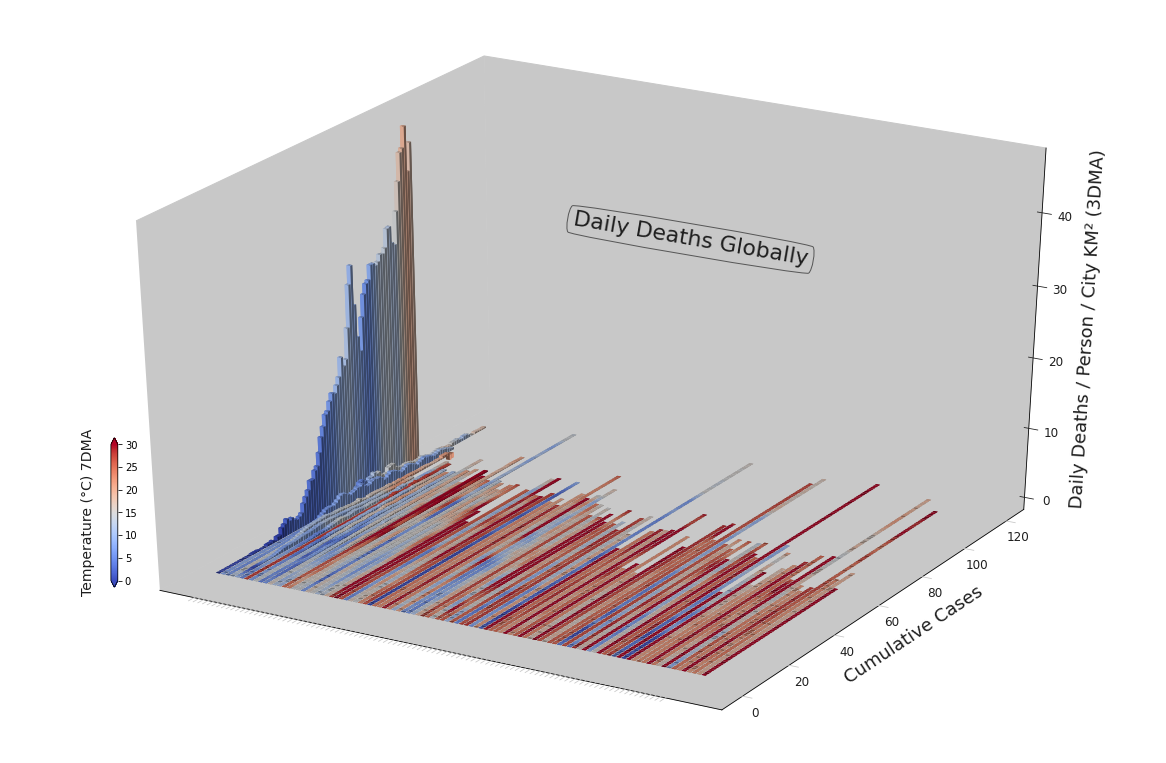

In [11]:
kwargs = {
    'title': 'Daily Deaths Globally',
    'fs_xticks': 16, 'fs_yticks': 12, 'fs_zticks': 12,
    'fs_xlabel': 12, 'fs_ylabel': 18, 'fs_zlabel': 18,
    'x_title': 0.490, 'y_title': 0.655, 'fs_title': 22, 'rot_title': -9.7,
    'x_subtitle': 0.506, 'y_subtitle': 0.712, 'fs_subtitle': 16,
    'x_datetitle': 0.5849, 'y_datetitle': 0.689 , 'fs_datetitle': 16,    
    'x_colorbar': 0.09, 'y_colorbar': .225, 'h_colorbar': 20, 'w_colorbar': .01, 'a_colorbar': 'vertical',
    'lp_colorbar': -57,
    'tight': True, 'gridlines': False,
    'color_factor': 'temp_dma',
    'color_interval': color_interval,
    'comp_size': 102,
}

p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_person_per_city_KM2', **kwargs)

Now, ***if*** temperature *for some reason* did impact the fatality rate associated with COVID19, what we would expect to see is regions at the far end of the x-axis would tend toward the **blue** end of the color spectrum and regions at the near end of the x-axis would tend towards **red**.

We would also expect to see regions with higher peaks to have more **blue** bars on the near-end of the y-axis, or at times earlier in the outbreak.

# Next Section

Click on this link to go to the next notebook: [6. Visualizing via Heat Map](https://ryanskene.github.io/see19/guide/6.%20See19%20-%20Visualizing%20via%20Heat%20Map.html)